In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"D:\Data Project\IMDb top 1000\archive\Top 1000 IMDB movies.csv")

In [3]:
df

,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description
0,0,The Shawshank Redemption,(1994),142 min,9.3,81,"34,709",$28.34M,Two imprisoned men bond over a number of years...
1,1,The Godfather,(1972),175 min,9.2,100,"34,709",$134.97M,The aging patriarch of an organized crime dyna...
2,2,The Dark Knight,(2008),152 min,9.0,84,"34,709",$534.86M,When the menace known as the Joker wreaks havo...
3,3,The Lord of the Rings: The Return of the King,(2003),201 min,9.0,94,"34,709",$377.85M,Gandalf and Aragorn lead the World of Men agai...
4,4,Schindler's List,(1993),195 min,9.0,94,"34,709",$96.90M,"In German-occupied Poland during World War II,..."
...,...,...,...,...,...,...,...,...,...
995,995,Sabrina,(1954),113 min,7.6,72,"34,709",%^%^%^,A playboy becomes interested in the daughter o...
996,996,From Here to Eternity,(1953),118 min,7.6,85,"34,709",$30.50M,"At a U.S. Army base in 1941 Hawaii, a private ..."
997,997,Snow White and the Seven Dwarfs,(1937),83 min,7.6,95,"34,709",$184.93M,Exiled into the dangerous forest by her wicked...
998,998,The 39 Steps,(1935),86 min,7.6,93,"34,709",%^%^%^,A man in London tries to help a counter-espion...


In [4]:
print(df.head())
print(df.info())
print(df.isnull().sum())

   Unnamed: 0                                     Movie Name Year of Release  \
0           0                       The Shawshank Redemption          (1994)   
1           1                                  The Godfather          (1972)   
2           2                                The Dark Knight          (2008)   
3           3  The Lord of the Rings: The Return of the King          (2003)   
4           4                               Schindler's List          (1993)   

  Watch Time  Movie Rating Meatscore of movie   Votes     Gross  \
0    142 min           9.3         81          34,709   $28.34M   
1    175 min           9.2        100          34,709  $134.97M   
2    152 min           9.0         84          34,709  $534.86M   
3    201 min           9.0         94          34,709  $377.85M   
4    195 min           9.0         94          34,709   $96.90M   

                                         Description  
0  Two imprisoned men bond over a number of years...  
1  The

In [5]:
#dropping index column 'Unnamed'
df=df.drop(columns=['Unnamed: 0'])


In [6]:
#Renaming columns for better understanding
df = df.rename(columns={
    'Movie Name': 'Title',
    'Year of Release': 'Year',
    'Watch Time': 'Runtime',
    'Movie Rating': 'IMDB_Rating',
    'Meatscore of movie': 'Metascore',
    'Votes': 'Votes',
    'Gross': 'Gross',
    'Description': 'Description'
})

In [7]:
#type conversions
df['Year']=(df['Year'].str.extract(r'(\d{4})'))
df['Year']=pd.to_numeric(df['Year'])

In [8]:
df

,Title,Year,Runtime,IMDB_Rating,Metascore,Votes,Gross,Description
0,The Shawshank Redemption,1994,142 min,9.3,81,"34,709",$28.34M,Two imprisoned men bond over a number of years...
1,The Godfather,1972,175 min,9.2,100,"34,709",$134.97M,The aging patriarch of an organized crime dyna...
2,The Dark Knight,2008,152 min,9.0,84,"34,709",$534.86M,When the menace known as the Joker wreaks havo...
3,The Lord of the Rings: The Return of the King,2003,201 min,9.0,94,"34,709",$377.85M,Gandalf and Aragorn lead the World of Men agai...
4,Schindler's List,1993,195 min,9.0,94,"34,709",$96.90M,"In German-occupied Poland during World War II,..."
...,...,...,...,...,...,...,...,...
995,Sabrina,1954,113 min,7.6,72,"34,709",%^%^%^,A playboy becomes interested in the daughter o...
996,From Here to Eternity,1953,118 min,7.6,85,"34,709",$30.50M,"At a U.S. Army base in 1941 Hawaii, a private ..."
997,Snow White and the Seven Dwarfs,1937,83 min,7.6,95,"34,709",$184.93M,Exiled into the dangerous forest by her wicked...
998,The 39 Steps,1935,86 min,7.6,93,"34,709",%^%^%^,A man in London tries to help a counter-espion...


In [9]:
#Create decade column
df['Decade']=(df['Year']//10)*10

In [10]:
#removin gross column since it has non digit values
df.drop(columns=['Gross'],inplace=True)

In [11]:
df.dtypes

Title           object
Year             int64
Runtime         object
IMDB_Rating    float64
Metascore       object
Votes           object
Description     object
Decade           int64
dtype: object

In [12]:
#Runtime in object. lets remove min and space then convert into int
df['Runtime']=df['Runtime'].str.replace("min","",regex=False) #to avoid causing unexpected results if your search string contains characters that have a special meaning in regex (like . or * or ?).
df['Runtime']=pd.to_numeric(df['Runtime'],errors='coerce')

In [13]:
df.head()

,Title,Year,Runtime,IMDB_Rating,Metascore,Votes,Description,Decade
0,The Shawshank Redemption,1994,142,9.3,81,"34,709",Two imprisoned men bond over a number of years...,1990
1,The Godfather,1972,175,9.2,100,"34,709",The aging patriarch of an organized crime dyna...,1970
2,The Dark Knight,2008,152,9.0,84,"34,709",When the menace known as the Joker wreaks havo...,2000
3,The Lord of the Rings: The Return of the King,2003,201,9.0,94,"34,709",Gandalf and Aragorn lead the World of Men agai...,2000
4,Schindler's List,1993,195,9.0,94,"34,709","In German-occupied Poland during World War II,...",1990


In [14]:
#new column to categorize rating
df['Rating_Category']=pd.cut(df['IMDB_Rating'],bins=[0,6,7,8,9,10],labels=['Poor', 'Average', 'Good', 'Very Good', 'Excellent'])

In [15]:
#new column categorizing runtimes
df['Runtime_Category']=pd.cut(df['Runtime'],bins=[0,90,120,180,500],  labels=['Short (<90 min)', 'Standard (90–120 min)', 'Long (120–180 min)', 'Epic (>180 min)'])

In [16]:
df

,Title,Year,Runtime,IMDB_Rating,Metascore,Votes,Description,Decade,Rating_Category,Runtime_Category
0,The Shawshank Redemption,1994,142,9.3,81,"34,709",Two imprisoned men bond over a number of years...,1990,Excellent,Long (120–180 min)
1,The Godfather,1972,175,9.2,100,"34,709",The aging patriarch of an organized crime dyna...,1970,Excellent,Long (120–180 min)
2,The Dark Knight,2008,152,9.0,84,"34,709",When the menace known as the Joker wreaks havo...,2000,Very Good,Long (120–180 min)
3,The Lord of the Rings: The Return of the King,2003,201,9.0,94,"34,709",Gandalf and Aragorn lead the World of Men agai...,2000,Very Good,Epic (>180 min)
4,Schindler's List,1993,195,9.0,94,"34,709","In German-occupied Poland during World War II,...",1990,Very Good,Epic (>180 min)
...,...,...,...,...,...,...,...,...,...,...
995,Sabrina,1954,113,7.6,72,"34,709",A playboy becomes interested in the daughter o...,1950,Good,Standard (90–120 min)
996,From Here to Eternity,1953,118,7.6,85,"34,709","At a U.S. Army base in 1941 Hawaii, a private ...",1950,Good,Standard (90–120 min)
997,Snow White and the Seven Dwarfs,1937,83,7.6,95,"34,709",Exiled into the dangerous forest by her wicked...,1930,Good,Short (<90 min)
998,The 39 Steps,1935,86,7.6,93,"34,709",A man in London tries to help a counter-espion...,1930,Good,Short (<90 min)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Title             1000 non-null   object  
 1   Year              1000 non-null   int64   
 2   Runtime           1000 non-null   int64   
 3   IMDB_Rating       1000 non-null   float64 
 4   Metascore         1000 non-null   object  
 5   Votes             1000 non-null   object  
 6   Description       1000 non-null   object  
 7   Decade            1000 non-null   int64   
 8   Rating_Category   1000 non-null   category
 9   Runtime_Category  1000 non-null   category
dtypes: category(2), float64(1), int64(3), object(4)
memory usage: 65.0+ KB


In [19]:
df['Votes'].isna().sum()

np.int64(0)

In [18]:
#convert votes to integer
df['Votes']=df['Votes'].str.replace(',','').astype(int)

In [20]:
#Average rating by decade
avg_rating_by_decade=df.groupby('Decade')['IMDB_Rating'].mean().reset_index()
avg_rating_by_decade
#reset_index- createa new default index, if not given theres a chance that the decade value might turn into index

,Decade,IMDB_Rating
0,1920,8.136364
1,1930,7.938462
2,1940,8.023684
3,1950,8.058333
4,1960,7.962162
5,1970,7.994203
6,1980,7.957778
7,1990,7.980556
8,2000,7.908811
9,2010,7.934746


In [21]:
#Movie count by decade
count_by_decade=df.groupby('Decade')['Title'].count().reset_index(name='Movie_Count')
count_by_decade

,Decade,Movie_Count
0,1920,11
1,1930,26
2,1940,38
3,1950,60
4,1960,74
5,1970,69
6,1980,90
7,1990,144
8,2000,227
9,2010,236


In [22]:
#Average rating by rating category
avg_rating_by_cat=df.groupby('Rating_Category')['IMDB_Rating'].mean().reset_index()
avg_rating_by_cat

C:\Users\shabi\AppData\Local\Temp\ipykernel_10524\156548235.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_cat=df.groupby('Rating_Category')['IMDB_Rating'].mean().reset_index()


,Rating_Category,IMDB_Rating
0,Poor,NaN
1,Average,NaN
2,Good,7.805263
3,Very Good,8.269369
4,Excellent,9.250000


In [23]:
df['Rating_Category'].value_counts(dropna=False)


Rating_Category
Good         665
Very Good    333
Excellent      2
Poor           0
Average        0
Name: count, dtype: int64

In [24]:
#Average Runtime by runtime category
avg_runtime_by_cat=df.groupby("Runtime_Category")['Runtime'].mean().reset_index()
avg_runtime_by_cat

C:\Users\shabi\AppData\Local\Temp\ipykernel_10524\68519612.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_runtime_by_cat=df.groupby("Runtime_Category")['Runtime'].mean().reset_index()


,Runtime_Category,Runtime
0,Short (<90 min),82.759494
1,Standard (90–120 min),106.135514
2,Long (120–180 min),140.533186
3,Epic (>180 min),201.512195


In [25]:
df

,Title,Year,Runtime,IMDB_Rating,Metascore,Votes,Description,Decade,Rating_Category,Runtime_Category
0,The Shawshank Redemption,1994,142,9.3,81,34709,Two imprisoned men bond over a number of years...,1990,Excellent,Long (120–180 min)
1,The Godfather,1972,175,9.2,100,34709,The aging patriarch of an organized crime dyna...,1970,Excellent,Long (120–180 min)
2,The Dark Knight,2008,152,9.0,84,34709,When the menace known as the Joker wreaks havo...,2000,Very Good,Long (120–180 min)
3,The Lord of the Rings: The Return of the King,2003,201,9.0,94,34709,Gandalf and Aragorn lead the World of Men agai...,2000,Very Good,Epic (>180 min)
4,Schindler's List,1993,195,9.0,94,34709,"In German-occupied Poland during World War II,...",1990,Very Good,Epic (>180 min)
...,...,...,...,...,...,...,...,...,...,...
995,Sabrina,1954,113,7.6,72,34709,A playboy becomes interested in the daughter o...,1950,Good,Standard (90–120 min)
996,From Here to Eternity,1953,118,7.6,85,34709,"At a U.S. Army base in 1941 Hawaii, a private ...",1950,Good,Standard (90–120 min)
997,Snow White and the Seven Dwarfs,1937,83,7.6,95,34709,Exiled into the dangerous forest by her wicked...,1930,Good,Short (<90 min)
998,The 39 Steps,1935,86,7.6,93,34709,A man in London tries to help a counter-espion...,1930,Good,Short (<90 min)


### Basic Visualizations

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
sns.set_theme(style='darkgrid')

In [46]:
sns.set_theme(style='darkgrid')

C:\Users\shabi\AppData\Local\Temp\ipykernel_10524\2743104811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_runtime_by_cat,x='Runtime_Category',y='Runtime',palette='viridis')


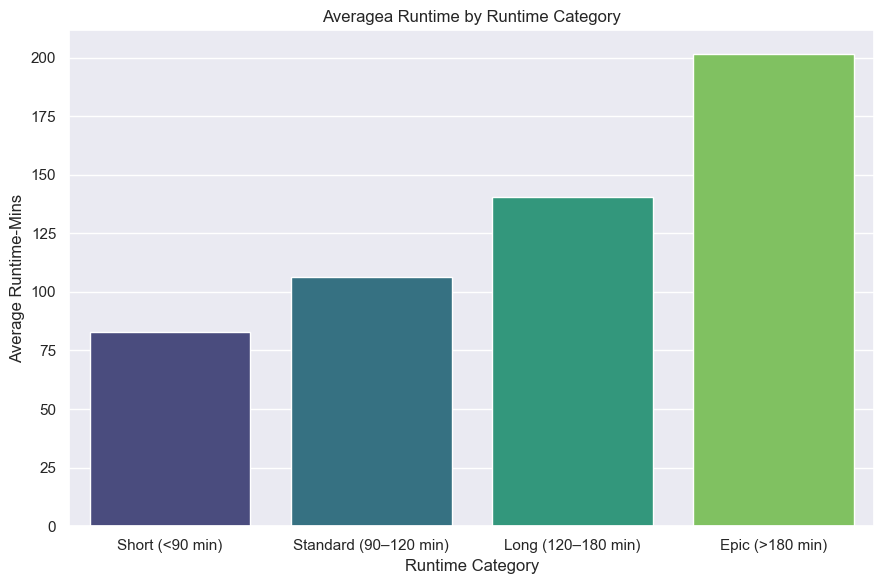

In [91]:
# 1. Average Runtime by Runtime Category
plt.figure(figsize=(9,6))
sns.barplot(data=avg_runtime_by_cat,x='Runtime_Category',y='Runtime',palette='viridis')
plt.title("Averagea Runtime by Runtime Category")
plt.xlabel('Runtime Category')
plt.ylabel("Average Runtime-Mins")
plt.tight_layout()
plt.savefig("plot1_avg_runtime.png")  # save screenshot
plt.show()

C:\Users\shabi\AppData\Local\Temp\ipykernel_10524\4025651208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Rating_Category',


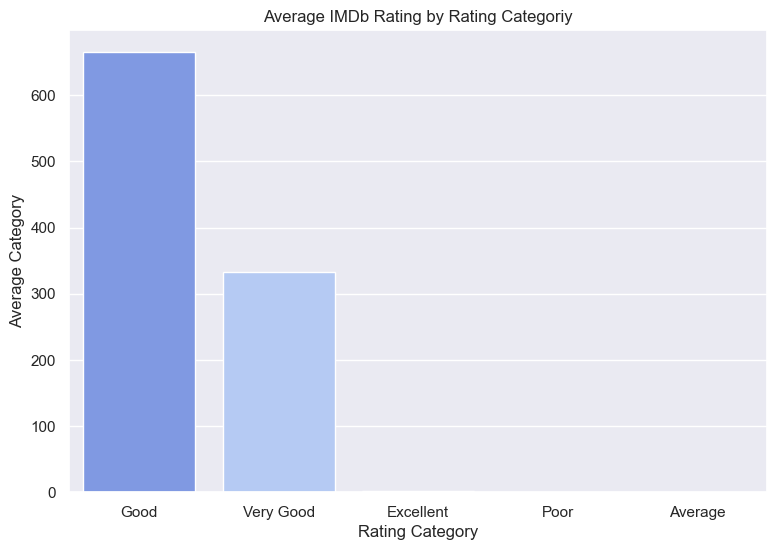

In [94]:
# 2. Average Rating by Rating Category
plt.figure(figsize=(9,6))
sns.countplot(data=df,x='Rating_Category',
            palette='coolwarm',order=df['Rating_Category'].value_counts().index)
#Sorts the avg_rating_by_cat DataFrame by the IMDB_Rating column, highest first.
#From that sorted DataFrame, it takes only the Rating_Category column.
plt.xlabel('Rating Category')
plt.ylabel('Average Category')
plt.title("Average IMDb Rating by Rating Categoriy")
plt.savefig("plot2_avg_rating.png") 

plt.show()

In [51]:
print((df['Rating_Category']=='Excellent').sum())

2


C:\Users\shabi\AppData\Local\Temp\ipykernel_10524\1031465577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=count_by_decade,x='Decade',y='Movie_Count',palette='crest')


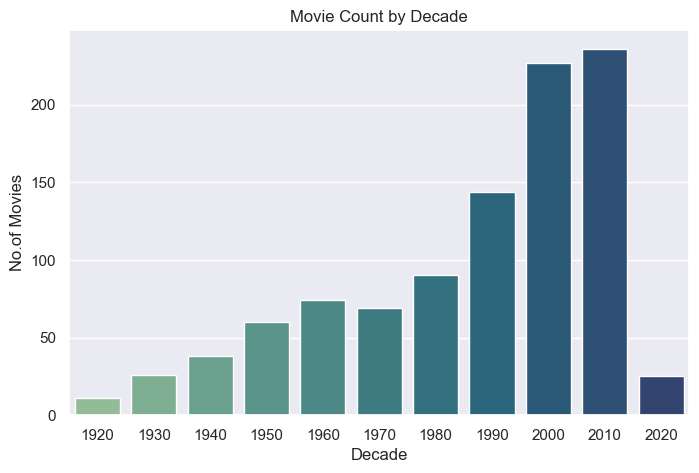

In [93]:
# 3. Movie Count by Decade
plt.figure(figsize=(8,5))
sns.barplot(data=count_by_decade,x='Decade',y='Movie_Count',palette='crest')
plt.title('Movie Count by Decade')
plt.xlabel('Decade')
plt.ylabel('No.of Movies')
plt.savefig("plot3_movie_count_by_decade.png")
plt.show()

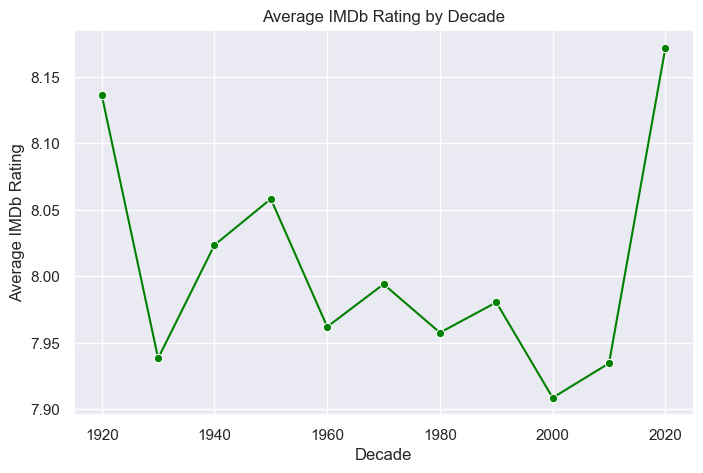

In [95]:
# 4. Average Rating by Decade
plt.figure(figsize=(8,5))
sns.lineplot(data=avg_rating_by_decade,x='Decade',y='IMDB_Rating',marker='o',color='green')
plt.title("Average IMDb Rating by Decade")
plt.xlabel("Decade")
plt.ylabel("Average IMDb Rating")
plt.savefig("plot4_avg_rating_by_decade.png") 
plt.show()

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Title             1000 non-null   object  
 1   Year              1000 non-null   int64   
 2   Runtime           1000 non-null   int64   
 3   IMDB_Rating       1000 non-null   float64 
 4   Metascore         1000 non-null   float64 
 5   Votes             1000 non-null   int64   
 6   Description       1000 non-null   object  
 7   Decade            1000 non-null   int64   
 8   Rating_Category   1000 non-null   category
 9   Runtime_Category  1000 non-null   category
dtypes: category(2), float64(2), int64(4), object(2)
memory usage: 65.0+ KB


In [65]:
df['Metascore']=pd.to_numeric(df['Metascore'],errors='coerce')

In [76]:
df['Metascore'].unique()[:20]

array([ 81.        , 100.        ,  84.        ,  94.        ,
        90.        ,  96.        ,  78.68660287,  74.        ,
        87.        ,  66.        ,  92.        ,  82.        ,
        73.        ,  78.        ,  79.        ,  91.        ,
        61.        ,  59.        ,  65.        ,  75.        ])

In [72]:
df['Metascore'].fillna(df['Metascore'].mean(),inplace=True)

In [74]:
df

,Title,Year,Runtime,IMDB_Rating,Metascore,Votes,Description,Decade,Rating_Category,Runtime_Category
0,The Shawshank Redemption,1994,142,9.3,81.0,34709,Two imprisoned men bond over a number of years...,1990,Excellent,Long (120–180 min)
1,The Godfather,1972,175,9.2,100.0,34709,The aging patriarch of an organized crime dyna...,1970,Excellent,Long (120–180 min)
2,The Dark Knight,2008,152,9.0,84.0,34709,When the menace known as the Joker wreaks havo...,2000,Very Good,Long (120–180 min)
3,The Lord of the Rings: The Return of the King,2003,201,9.0,94.0,34709,Gandalf and Aragorn lead the World of Men agai...,2000,Very Good,Epic (>180 min)
4,Schindler's List,1993,195,9.0,94.0,34709,"In German-occupied Poland during World War II,...",1990,Very Good,Epic (>180 min)
...,...,...,...,...,...,...,...,...,...,...
995,Sabrina,1954,113,7.6,72.0,34709,A playboy becomes interested in the daughter o...,1950,Good,Standard (90–120 min)
996,From Here to Eternity,1953,118,7.6,85.0,34709,"At a U.S. Army base in 1941 Hawaii, a private ...",1950,Good,Standard (90–120 min)
997,Snow White and the Seven Dwarfs,1937,83,7.6,95.0,34709,Exiled into the dangerous forest by her wicked...,1930,Good,Short (<90 min)
998,The 39 Steps,1935,86,7.6,93.0,34709,A man in London tries to help a counter-espion...,1930,Good,Short (<90 min)


In [77]:
df['Metascore'] = df['Metascore'].round(2)


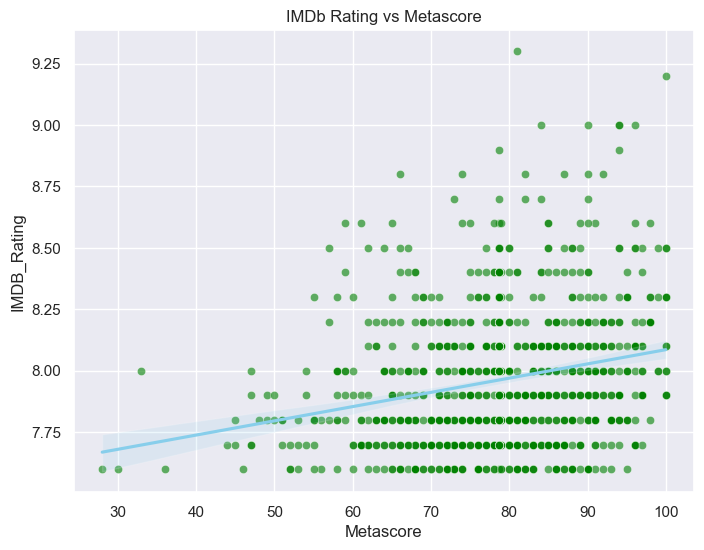

In [96]:
#5. Scatter plot: IMDb Rating vs Metascore
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='Metascore',y='IMDB_Rating',alpha=0.6,color='green')
sns.regplot(data=df, x='Metascore', y='IMDB_Rating', scatter=False, color='skyblue')  # trend line on top of the scatterplot
plt.title("IMDb Rating vs Metascore")
plt.savefig("plot5_vs_rating_scatter.png") 
plt.show()

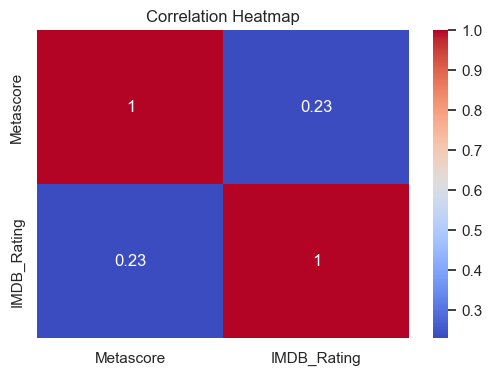

In [97]:
#6. Correlation Heatmap
#df_orig = df[df['Metascore'] != 78.69]  # only original values

plt.figure(figsize=(6,4))
sns.heatmap(df[['Metascore','IMDB_Rating']].corr(), annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("plot6_vs_rating_heatmap.png") 
plt.show()

In [98]:
with open("requirements.txt", "w") as f:
    f.write("pandas\n")
    f.write("matplotlib\n")
    f.write("seaborn\n")

In [99]:
df.to_csv("IMDB_Cleaned.csv", index=False)